In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

S:\Users\sifat\anaconda3\envs\tf-gpu\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
S:\Users\sifat\anaconda3\envs\tf-gpu\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
S:\Users\sifat\anaconda3\envs\tf-gpu\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [3]:
reeses = cv2.imread('test images/reeses_puffs.jpg',0)

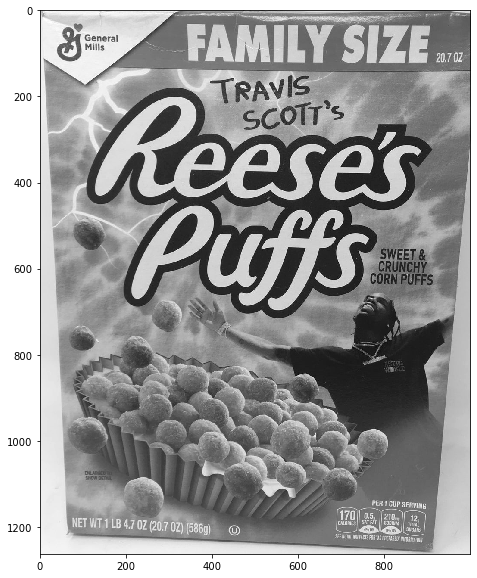

In [4]:
display(reeses)

In [5]:
cereals = cv2.imread('test images/more_cereals.jpg',0)

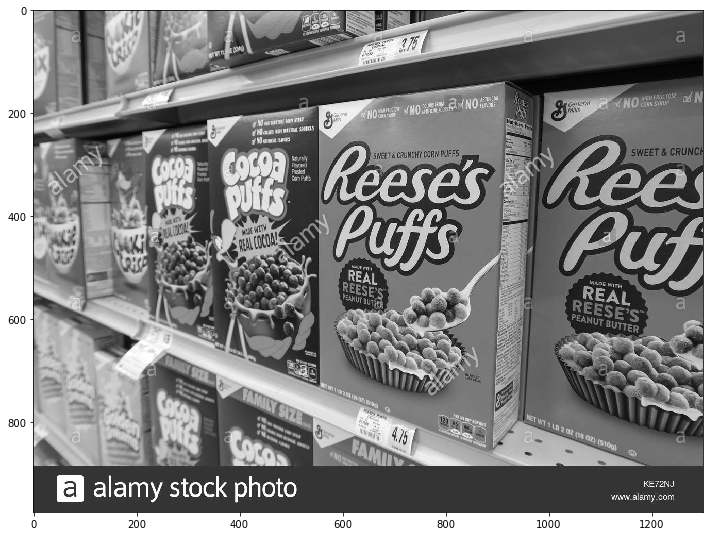

In [6]:
display(cereals)

In [7]:
##ORB DETECTOR

orb = cv2.ORB_create()

In [8]:
kp1,des1 = orb.detectAndCompute(reeses,None)
kp2,des2 = orb.detectAndCompute(cereals,None)

In [9]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)

In [10]:
matches = bf.match(des1,des2)
matches[0].distance

#The output means the less distance it has , the more better the match
#the more distance it has the match goes firther from the match

50.0

In [11]:
# so we are basically sorting them
matches = sorted(matches,key=lambda x:x.distance)

In [12]:
reeses_matches = cv2.drawMatches(reeses,kp1,cereals,kp2,matches[:25],None,flags=2)

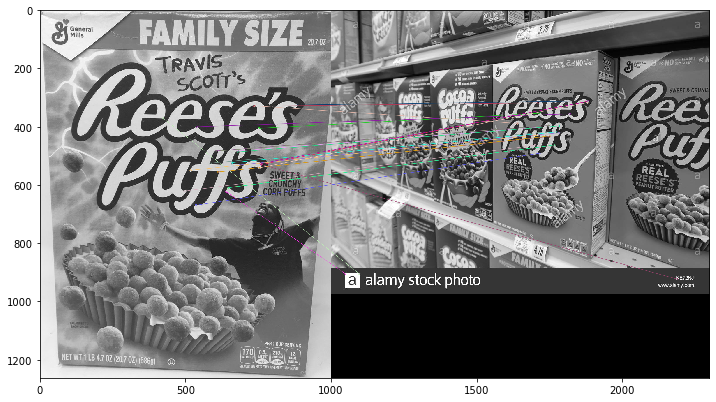

In [13]:
display(reeses_matches)

In [14]:
# using sift descriptors SIFT-> Scale Invariant feature transform
sift = cv2.xfeatures2d.SIFT_create()

In [15]:
kp1,des1 = sift.detectAndCompute(reeses,None)
kp2,des2 = sift.detectAndCompute(cereals,None)

In [16]:
bf = cv2.BFMatcher()

In [17]:
matches = bf.knnMatch(des1,des2,k=2)

In [18]:
good = []

# LESS == BETTER MATCH

for match1,match2 in matches:
    # IF MATCH 1 IS LESS THAN 75% OF MATCH 2 DISTANCE
    # THEN DESCRIPTOR WAS A GOOD MATCH, LETS KEEP IT !
    if match1.distance < 0.75*match2.distance:
        good.append([match1])

In [19]:
# matches
len(good)

429

In [20]:
len(matches)

4860

In [21]:
sift_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=2)

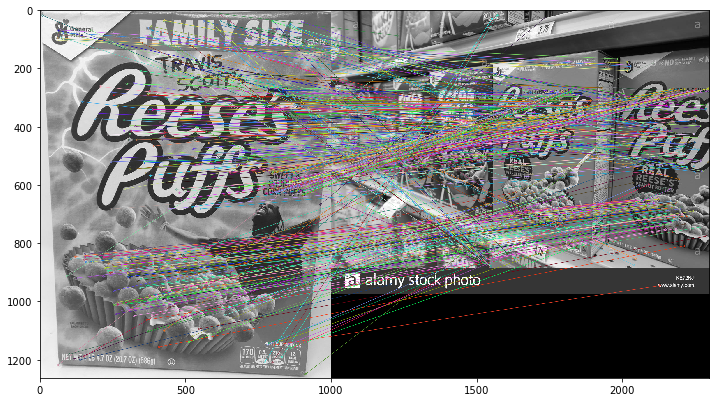

In [22]:
display(sift_matches)

In [35]:
sift = cv2.xfeatures2d.SIFT_create()

In [36]:
kp1,des1 = sift.detectAndCompute(reeses,None)
kp2,des2 = sift.detectAndCompute(cereals,None)

In [37]:
# FLANN 
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTREE,trees=5)
search_params = dict(checks=50)

In [38]:
flann = cv2.FlannBasedMatcher(index_params,search_params)

In [39]:
matches = flann.knnMatch(des1,des2,k=2)

In [41]:
# matchesMask = [[0,0] for i in range(len(matches))]
# matchesMask

In [30]:
good = []

for match1,match2 in matches:
    if match1.distance < 0.7*match2.distance:
        
        good.append([match1])

In [33]:
flann_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=0)

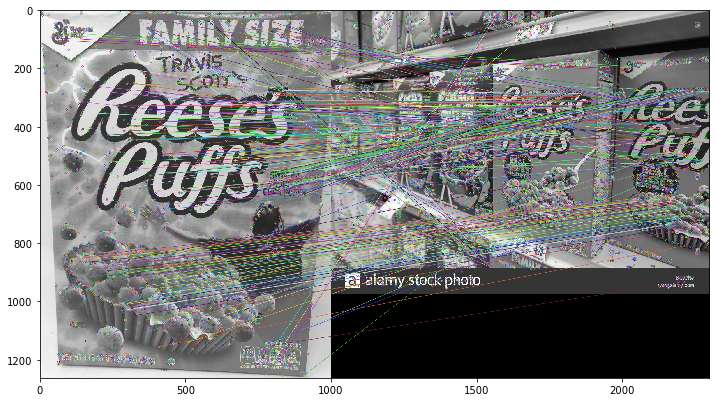

In [34]:
display(flann_matches)

In [42]:
## FLANN WITH MASK

In [43]:
sift = cv2.xfeatures2d.SIFT_create()

In [44]:
kp1,des1 = sift.detectAndCompute(reeses,None)
kp2,des2 = sift.detectAndCompute(cereals,None)

In [45]:
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTREE,trees=5)
search_params = dict(checks=50)

In [46]:
flann = cv2.FlannBasedMatcher(index_params,search_params)

In [47]:
matches = flann.knnMatch(des1,des2,k=2)

In [48]:
matchesMask = [[0,0] for i in range(len(matches))]

In [53]:
good = []

for i,(match1,match2) in enumerate(matches):
    if match1.distance < 0.7*match2.distance:
        matchesMask[i] = [1,0]
#         good.append([match1])

In [59]:
draw_params = dict(matchColor=(0,0,255),
                  singlePointColor=(255,0,0),
                  matchesMask=matchesMask,
                   flags=0)  

In [60]:
flann_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,matches,None,**draw_params)

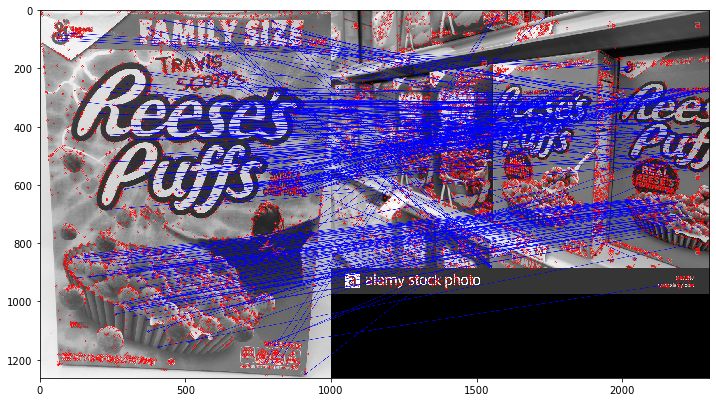

In [61]:
display(flann_matches)